# Week9 异常检测和推荐系统
- 高斯分布
$$p(x;\mu, \sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$
- 异常检测算法
  1. 选择你认为可以代表异常的特征
  2. 根据训练集计算参数$\mu$和$\sigma$
      $$\mu_j=\frac{1}{m}\sum_{i=1}^{m}x_j^{(i)}$$
      $$\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$$
  3. 对于测试集某个样本x, 计算p(x):
      $$p(x)=\prod_{j=1}^np(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac{1}{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$$
     当p(x)小于自己设定的$\varepsilon$认为该样本异常
- 异常检测算法示例  
  若有10000个good样本, 20个异常样本; 则训练集为6000个good样本, CV集为2000good样本和10个异常样本, Test集为2000good样本和10个异常样本  
  评估该算法的方法(求准确率的方法不适用, 因为异常值较小, 只需要预测所有都为正常值即可得到较高的准确率):
      1. True positive, false positive, false negative, true negative
      2. Precision/Recall
      3. F1-score
- 异常检测和监督学习的区别: 异常检测适用于正例很少, 反例很多的情况; 监督学习适用于正反例都很多的情况.
- 选择合适的特征  
  异常检测算法是假设特征为高斯分布, 所以先用dist画出特征的直方图, 观察其是否满足高斯分布. 若不满足则需要经过一定的转换, 如: $log(x1)$,  $log(x_2+1)$, $\sqrt{x_3}$, $x_4^{\frac{1}{3}}$  
  一个好的特征应该是p(x)对于正常样本较大, 对于异常样本很小  
  选择的特征应该是在异常样本中不同寻常的大或小
- 多维高斯分布下的异常检测算法
  $$p(x;\mu, \Sigma)=\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$
  $$\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$$
  $$\Sigma=\frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu)(x^{(i)}-\mu)^T$$  
  $\Sigma$为各个特征之间的协方差矩阵, 对角线上的值为各个特征的方差, 其余元素为特征之间的相关性, 越大则其越为线性.
## 推荐系统  
- 基于内容的推荐(如对于电影推荐来说, 已知用户对于一些电影的评分, 给用户推荐电影)  
  基于内容的意思是已知电影的特征$x$, 代表各个方面的程度(如动作, 爱情), 然后根据用户的评分为每一位用户训练$\theta$, 即:  
  learn$\theta^{(j)}$(用户j的参数, r(i,j)=1表示用户j对电影i有评分): 
  $$\min_{\theta^{(j)}}\frac{1}{2}\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{k=1}^{n}(\theta_k^{(j)})^2$$  
  该方法和线性回归差不多, 只是少了一个$\frac{1}{m}$项
- 协同滤波(该方法可以自行学习所要使用的特征)
  该方法的主要思想是: 可以根据用户的评分来学习电影的特征. 也就是说既可以根据$x$学习$\theta$, 也可以根据$\theta$学习$x$. 可以一开始随机猜测出$\theta$的值, 然后迭代的学习$x$, $\theta$, $x$, $\theta$, $x$.......  
  设$n_m$为电影数目, $n_u$为用户数目  
  Given $x^{(1)}, ..., x^{n_m}$, 估计$\theta^{(1)}, ..., \theta^{(n_u)}$:
  $$min_{\theta^{(1)}, ..., \theta^{(n_u)}}\frac{1}{2}\sum_{j=1}^{n_u}\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^{n}(\theta_k^{(j)})^2$$ 
  Given $\theta^{(1)}, ..., \theta^{(n_u)}$, 估计$x^{(1)}, ..., x^{n_m}$:  
  $$min_{x^{(1)}, ..., x^{n_m}}\frac{1}{2}\sum_{i=1}^{n_m}\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^{n}(x_k^{(i)})^2$$  
  可以将上面两个步骤合并, Minimizing $\theta^{(1)}, ..., \theta^{(n_u)}$ 和$x^{(1)}, ..., x^{n_m}$ simultaneously:
  $$J(\theta^{(1)}, ..., \theta^{(n_u)}, x^{(1)}, ..., x^{n_m})=\frac{1}{2}\sum_{i,j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^{n}(x_k^{(i)})^2+\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^{n}(\theta_k^{(j)})^2$$
- 协同滤波算法步骤  
  1. 随机初始化$\theta^{(1)}, ..., \theta^{(n_u)}, x^{(1)}, ..., x^{n_m}$
  2. 使用梯度下降法或别的advanced optimization algorithm得到使损失函数最小的参数(注意没有$x_0$, 也就没有$\theta_0$)
  $$x_k^{(i)}:=x_k^{(i)}-\alpha(\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})\theta_k^{(j)}+\lambda x_k^{(i)})$$  
  $$\theta_k^{(j)}:=\theta_k^{(j)}-\alpha(\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})x_k^{(j)}+\lambda \theta_k^{(i)})$$  
- 低秩矩阵分解  
  ..........懒得写了....低秩矩阵分解 视频 Vectorization: Low Rank Matrix Factorization
  Y矩阵为一个$n_m*n_u$的矩阵, 第i行第j列的元素表示第j个用户对第i个电影的评价, 若未评价则为问号.  
  均值归一化会让算法运行的更好(因为当用户j没有对任何电影评分时, 其参数$\theta^{(j)}$最后将全为0, 则其对每一部电影的预测评价都为0, 此时将无法推荐. 而均值归一化后, 每个预测值都需要加电影评分的平均值, 此时对于一个新用户即可根据电影的平均评分给其推荐):    
  $\mu$向量为$n_m*1$的矩阵, 第i行表示第i个电影的评价均值(没有评分的user_item即问号不计入均值计算)  
  使用$Y-\mu$进行学习参数.  
  预测时, 对于user j, movie i, 预测评分为$(\theta^{(j)})^T(x^{(i)})+\mu_i$
   

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import math

In [5]:
data1 = sio.loadmat('data/ex8data1.mat')
X1 = data1['X']
Xval1 = data1['Xval']
yval1 = data1['yval']

In [7]:
print(X1.shape)
print(Xval1.shape)
print(yval1.shape)

(307, 2)
(307, 2)
(307, 1)


Text(0, 0.5, 'Throuhput (mb/s)')

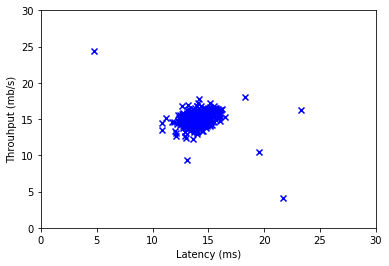

In [9]:
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throuhput (mb/s)')

In [ ]:
# Part 2: Estimate the dataset statistics
def estimateGaussian(X):
    return X.mean(), X.std()
